### **Read data**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

data_root = './dataset'
data_path = os.path.join(data_root, 'churn_data_clean.csv')

df = pd.read_csv(data_path)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [2]:
df.shape

(10348, 27)

### **Split Data**
Split data into training, validation, testing set with ratio 7:1:2

In [3]:
X = df.loc[:, df.columns != 'Churn'] # Features
y = df.loc[:, df.columns == 'Churn'] # Target
print(X.shape)
print(y.shape)

(10348, 26)
(10348, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

print('Training set: ', y_train.shape)
print('Validation set: ', y_val.shape)
print('Testing set: ', y_test.shape)

Training set:  (7243, 1)
Validation set:  (1035, 1)
Testing set:  (2070, 1)


### **Normalization**

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

### **RF-Adaboost**

Build Model

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
# Initialise base classifier model - Random Forest
clf_RF = RandomForestClassifier(n_estimators=10, random_state=42)
# Initialise Random Forest-based Adaboost Classifier
clf_AB_RF = AdaBoostClassifier(estimator=clf_RF, n_estimators=100)

Fit Model

In [7]:
import time
# Measure the training time of the model
t0 = time.time()

clf_AB_RF = clf_AB_RF.fit(X_train_normalized,y_train)

adaboost_train_time = time.time()-t0
print(f'Training time: {adaboost_train_time:.2f} s')

d:\Anaconda\envs\keras\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 27.23 s


Evaluation

Accuracy: 0.8502
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       493
           1       0.86      0.86      0.86       542

    accuracy                           0.85      1035
   macro avg       0.85      0.85      0.85      1035
weighted avg       0.85      0.85      0.85      1035



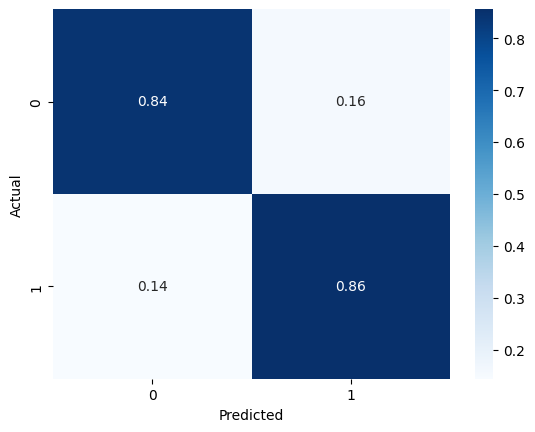

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_val_adaboost_pred = clf_AB_RF.predict(X_val_normalized)
accuracy = accuracy_score(y_val, y_val_adaboost_pred)

print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_adaboost_pred))
adaboost_confmat = confusion_matrix(y_val, y_val_adaboost_pred, normalize='true')

sns.heatmap(adaboost_confmat,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# svm_classifier = SVC(gamma='auto')

bagging_classifier2 = BaggingClassifier(base_estimator=svm_classifier, n_estimators=10, random_state=42, max_samples=0.5, max_features=0.5)

# Measure the training time of the model
t0 = time.time()

bagging_classifier2 = bagging_classifier2.fit(X_train, y_train.values.ravel())

bagging_train_time2 = time.time()-t0
print(f'Training time: {bagging_train_time2:.2f} s')

c:\Users\xiaoc\anaconda3\envs\keras\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training time: 4.76 s


Accuracy: 0.7923
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       493
           1       0.86      0.72      0.78       542

    accuracy                           0.79      1035
   macro avg       0.80      0.80      0.79      1035
weighted avg       0.80      0.79      0.79      1035



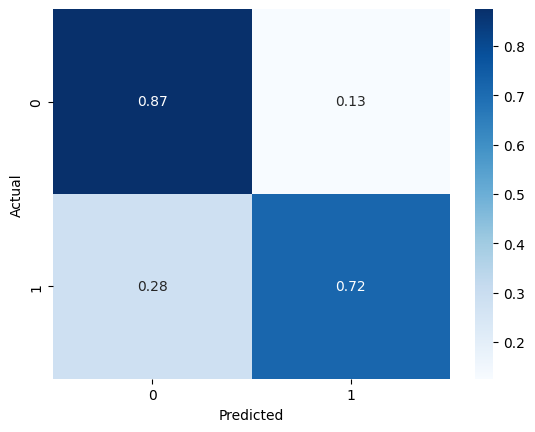

In [39]:
y_val_bagging_pred2 = bagging_classifier2.predict(X_val)
accuracy2 = accuracy_score(y_val, y_val_bagging_pred2)

print(f'Accuracy: {accuracy2:.4f}')

print('Classification Report:')
print(classification_report(y_val, y_val_bagging_pred2))
bagging_confmat2 = confusion_matrix(y_val, y_val_bagging_pred2, normalize='true')

sns.heatmap(bagging_confmat2,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()